In [ ]:
import tensorflow as tf
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.preprocessing.image import load_img, img_to_array
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Constants
IMAGE_WIDTH = 224
IMAGE_HEIGHT = 224
BATCH_SIZE = 32
EPOCHS = 10
NUM_CLASSES = 2  # Authentic and manipulated
DATA_DIR = "/content/drive/MyDrive/real_and_fake_face"

In [ ]:
# Function to load and preprocess images
def preprocess_images(image_paths, label):
    images = []
    labels = []
    for image_path in image_paths:
        image = load_img(image_path, target_size=(IMAGE_WIDTH, IMAGE_HEIGHT))
        image = img_to_array(image)
        images.append(image)
        labels.append(label)
    return np.array(images), np.array(labels)

In [ ]:
# Load and preprocess dataset
authentic_images = [os.path.join(DATA_DIR, "/content/drive/MyDrive/real_and_fake_face/training_real", filename) for filename in os.listdir(os.path.join(DATA_DIR, "/content/drive/MyDrive/real_and_fake_face/training_real"))]
manipulated_images = [os.path.join(DATA_DIR, "/content/drive/MyDrive/real_and_fake_face/training_fake", filename) for filename in os.listdir(os.path.join(DATA_DIR, "/content/drive/MyDrive/real_and_fake_face/training_fake"))]

authentic_X, authentic_y = preprocess_images(authentic_images, label=0)
manipulated_X, manipulated_y = preprocess_images(manipulated_images, label=1)

X = np.concatenate((authentic_X, manipulated_X), axis=0)
y = np.concatenate((authentic_y, manipulated_y), axis=0)

In [ ]:
# Convert labels to one-hot encoding
y = to_categorical(y, num_classes=NUM_CLASSES)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Define CNN architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(NUM_CLASSES, activation='softmax'))

In [ ]:
# Compile the model
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(X_test, y_test))

Epoch 1/10


51/51 [==============================] - 62s 1s/step - loss: 59.8606 - accuracy: 0.5214 - val_loss: 0.6845 - val_accuracy: 0.5428
Epoch 2/10
51/51 [==============================] - 58s 1s/step - loss: 1.6504 - accuracy: 0.5165 - val_loss: 0.6832 - val_accuracy: 0.5526
Epoch 3/10
51/51 [==============================] - 58s 1s/step - loss: 0.7315 - accuracy: 0.5594 - val_loss: 0.6752 - val_accuracy: 0.5526
Epoch 4/10
51/51 [==============================] - 58s 1s/step - loss: 0.7311 - accuracy: 0.5625 - val_loss: 0.6800 - val_accuracy: 0.5990
Epoch 5/10
51/51 [==============================] - 58s 1s/step - loss: 0.7023 - accuracy: 0.5944 - val_loss: 0.6811 - val_accuracy: 0.5844
Epoch 6/10
51/51 [==============================] - 58s 1s/step - loss: 0.7086 - accuracy: 0.6317 - val_loss: 0.7106 - val_accuracy: 0.5868
Epoch 7/10
51/51 [==============================] - 58s 1s/step - loss: 0.7979 - accuracy: 0.6403 - val_loss: 0.7011 - val_accuracy: 0.5599
Epoch 8/10
51/51 

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# Confusion matrix
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)
conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

13/13 [==============================] - 5s 333ms/step - loss: 0.7602 - accuracy: 0.5599
Test Loss: 0.7602468729019165
Test Accuracy: 0.5599021911621094
13/13 [==============================] - 5s 328ms/step
Confusion Matrix:
[[160  58]
 [122  69]]


In [ ]:
def classify_image(image_path, model):
    # Load and preprocess the image
    image = load_img(image_path, target_size=(IMAGE_WIDTH, IMAGE_HEIGHT))
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)  # Add batch dimension

    # Predict probabilities
    probabilities = model.predict(image)

    # Get class label
    class_label = np.argmax(probabilities)

    # Interpret class label
    if class_label == 0:
        classification = "Real"
        confidence = probabilities[0][0]  # Probability of being real
    elif class_label == 1:
        classification = "Fake"
        confidence = probabilities[0][1]  # Probability of being fake

    return classification, confidence

# Output
image_path = "r1.jpg"
classification, confidence = classify_image(image_path, model)
print("Classification:", classification)
print("Accuracy:", confidence)

1/1 [==============================] - 0s 118ms/step
Classification: Real
Accuracy: 0.52930856


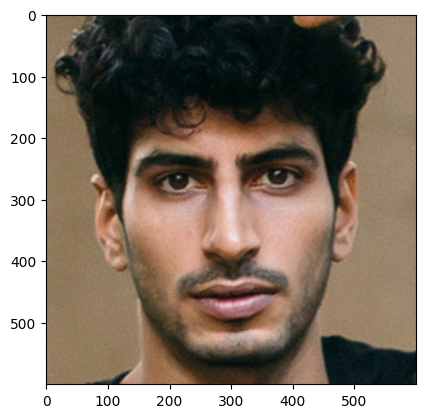

In [ ]:
image = plt.imread(image_path)
plt.imshow(image)